<div style="background-color: lightgreen; padding: 18px;">
    <h1> Projeto| Estatística I
</div>

### Esse projeto visa a aplicação dos conceitos e ferramental da Estatística desenvolvidos nesse módulo

##### Para o desenvolvimento das atividades abaixo, o seu grupo pode escolher qualquer dataset que contenha uma coluna com valores inteiros.

In [86]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [87]:
dataset = pd.read_csv(r"df_arabica_clean.csv", delimiter=",")

(dataset.head(10))

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
5,5,5,Guatemala,La Colina,"The 2022 Pacific Rim Coffee Summit,GT02",Dinámica Café,NaN,Taiwan Coffee Laboratory,1668,Chimaltenango,...,87.00,10.7,0,0,green,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
6,6,6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pacific Rim Coffee Summit,T034",野牡丹咖啡,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.92,9.1,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
7,7,7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,"The 2022 Pacific Rim Coffee Summit,T050",七彩琉璃咖啡莊園,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,86.75,10.0,0,0,yellow green,1,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
8,8,8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,"The 2022 Pacific Rim Coffee Summit,T018",亮軒咖啡莊園,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
9,9,9,"Tanzania, United Republic Of",MASHIMA AMCOS,CN 4127230034/4189230113,GOURMET COFFEE MILL,033/DE/503/002 and 033/DE/268/002,DORMAN (T) LIMITED,1400-1700,KILIMANJARO,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",Kenya Coffee Traders Association,"P.O. Box 646 00100Nairobi, Kenya, Denniss Prit...",Benson Kibicho Kamau - +254 786 821 621


In [88]:
(dataset.describe())

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


__1) Em algum dataset, classifique as suas colunas em Quantitativa Discreta, Quantitiva Contínua, Qualitativa Ordinal ou Qualitativa Nominal.__


In [89]:
(dataset.columns)

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

## Colunas Principais: Classificação

| Coluna | Classificação |
|:------:|:-------------:|
| Country of Origin | Qualitativa Nominal |
| Farm Name | Qualitativa Nominal |
| Lot Number | Qualitativa Ordinal |
| Company | Qualitativa Nominal |
| Altitude | *Quantitativa Contínua* |
| Region | Qualitativa Nominal |
| Producer | Qualitativa Nominal |
| Number of Bags | *Quantitativa Discreta* |
| Bag Weight | *Quantitativa Contínua* |
| Harvest Year | *Quantitativa Discreta* |
| Variety | Qualitativa Nominal |
| Processing Method | Qualitativa Nominal |
| Aroma | *Quantitativa Discreta* |
| Flavor | *Quantitativa Discreta* |
| Aftertaste | *Quantitativa Discreta* |
| Acidity | *Quantitativa Discreta* |
| Body | *Quantitativa Discreta* |
| Balance | *Quantitativa Discreta* |
| Uniformity | *Quantitativa Discreta* |
| Clean Cup | *Quantitativa Discreta* |
| Sweetness | *Quantitativa Discreta* |
| Overall | *Quantitativa Discreta* |
| Defects | *Quantitativa Contínua* |
| Total Cup Points | *Quantitativa Discreta* |
| Moisture Percentage | *Quantitativa Discreta* |
| Category One Defects | *Quantitativa Contínua* |
| Quakers | *Quantitativa Contínua* |
| Color | Qualitativa Nominal |
| Category Two Defects | *Quantitativa Contínua* |
| Expiration | Qualitativa Ordinal |

- **2.1) Com o mesmo dataset, construir a distribuição de probabilidade de uma feature com valores inteiros.**
- **2.2) Escrever uma função para calcular a Esperança e outra função para calcular a Variância dessa variável aleatória.** 
- **2.3) Compare o resultado de sua função com os resultados de alguma nativa do Python (há muitos módulos/bibliotecas que calculam esses parâmetros).**
- **2.4) Construa uma função que faça o papel da cdf() e outra função com o papel da sf().**
- **Desafio extra:** _construir funções que fazem o papel da ppf() e da isf()._

In [90]:
dataset['Total Cup Points'].unique()


array([89.33, 87.58, 87.42, 87.17, 87.08, 87.  , 86.92, 86.75, 86.67,
       86.5 , 86.25, 86.17, 86.08, 85.92, 85.83, 85.75, 85.67, 85.58,
       85.5 , 85.42, 85.33, 85.25, 85.17, 85.08, 85.  , 84.92, 84.83,
       84.75, 84.67, 84.58, 84.5 , 84.42, 84.33, 84.25, 84.17, 84.08,
       84.  , 83.92, 83.83, 83.75, 83.67, 83.58, 83.5 , 83.42, 83.33,
       83.25, 83.17, 83.08, 83.  , 82.92, 82.83, 82.75, 82.67, 82.58,
       82.5 , 82.42, 82.33, 82.25, 82.17, 82.08, 82.  , 81.92, 81.83,
       81.75, 81.67, 81.58, 81.5 , 81.42, 81.33, 81.17, 81.  , 80.83,
       80.5 , 80.42, 80.33, 80.17, 80.08, 80.  , 79.67, 78.08, 78.  ])

In [91]:
dataset['Total Cup Points'].describe()

count    207.000000
mean      83.706570
std        1.730417
min       78.000000
25%       82.580000
50%       83.750000
75%       84.830000
max       89.330000
Name: Total Cup Points, dtype: float64

In [102]:
# Escolhendo a feature
dataset['Rounded_Total_Cup_Points'] = dataset['Total Cup Points'].round()

value_counts = dataset["Rounded_Total_Cup_Points"].value_counts()
probabilities = value_counts / value_counts.sum()

print(probabilities)

Rounded_Total_Cup_Points
84.0    0.236715
85.0    0.188406
83.0    0.188406
82.0    0.164251
86.0    0.096618
80.0    0.043478
87.0    0.033816
81.0    0.028986
78.0    0.009662
89.0    0.004831
88.0    0.004831
Name: count, dtype: float64


In [103]:
value_counts

Rounded_Total_Cup_Points
84.0    49
85.0    39
83.0    39
82.0    34
86.0    20
80.0     9
87.0     7
81.0     6
78.0     2
89.0     1
88.0     1
Name: count, dtype: int64

In [104]:
# Calcular Esperança da Variável
# soma do produto de cada probabilidade de saida, pelo respectivo valor
from numpy.typing import ArrayLike

def esperanca(prob_arr: ArrayLike, value_arr: ArrayLike, exp: int = 1):
    return sum([prob * value ** exp for prob, value in zip(prob_arr, value_arr)])

In [105]:
# Calcular Variancia da Variavel, utilizando a esperança
from numpy.typing import ArrayLike

def variancia(prob_arr: ArrayLike, value_arr: ArrayLike):
    return esperanca(prob_arr, value_arr, exp=2) - (esperanca(prob_arr, value_arr)) ** 2

In [106]:
count = 207


values = [84, 85, 83, 82, 86, 80, 87, 81, 78, 89, 88]
counts = [49, 39, 39, 34, 20, 9, 7, 6, 2, 1, 1]
probabilites = [x/count for x in counts]

np_prob = np.array(probabilities)
np_values = np.array(values)

print(f"Esperança: {esperanca(prob_arr=np_prob, value_arr=np_values)}")
print(f"Variancia: {variancia(prob_arr=np_prob, value_arr=np_values):.2f}")

Esperança: 83.69082125603865
Variancia: 3.13


In [107]:
np_ratings = np.array(dataset['Total Cup Points'])

print(f"Esperança: {np.mean(np_ratings)}")
print(f"Variancia: {np.var(np_ratings):.2f}")

Esperança: 83.70657004830917
Variancia: 2.98


 __3) Utilizando a variável aleatória do exercício anterior, construir a distribuição das médias amostrais para ilustrar/comprovar o Teorema do Limite Central. Comparar a média e a variância com o exercício anterior. Utilizar o teste de normalidade para verificar se essa distribuição (das médias amostrais) é normal ou  não.__


In [108]:
# Bibliotecas
import numpy.random as nprd
import plotly.express as px
# import plotly.io as pio
import seaborn as sns
from sklearn.utils import resample
from scipy import stats

In [109]:
total_cup_scores = dataset['Total Cup Points']

cup_scores = nprd.choice(total_cup_scores, size=10, replace=False)

print(cup_scores)
print(f"Média da Amostra: {cup_scores.mean()}")

[84.33 83.92 82.58 84.83 84.   89.33 81.75 84.08 85.25 81.83]
Média da Amostra: 84.19


In [110]:
df_samples = pd.DataFrame(columns=['n', 'erro'])
pop_mean = dataset['Total Cup Points'].mean()

for sample_size in range(2, dataset.shape[0] + 1):
    total_cup_sample = dataset['Total Cup Points'].sample(n=sample_size, random_state=101)

    sample_mean = total_cup_sample.mean()
    erro = abs(pop_mean - sample_mean)

    df_samples = pd.concat([df_samples, pd.DataFrame({'n': [sample_size], 'erro': [erro]})])


# adicionando os index
df_samples.index = (list(range((df_samples.shape[0]))))

(df_samples)

,n,erro
0,2,1.206570e+00
1,3,1.429903e+00
2,4,1.144070e+00
3,5,9.225700e-01
4,6,7.615700e-01
...,...,...
201,203,2.016611e-02
202,204,1.617789e-02
203,205,1.344810e-02
204,206,1.036068e-03


In [111]:
px.line(df_samples, x='n', y='erro')

<Axes: xlabel='Total Cup Points', ylabel='Count'>

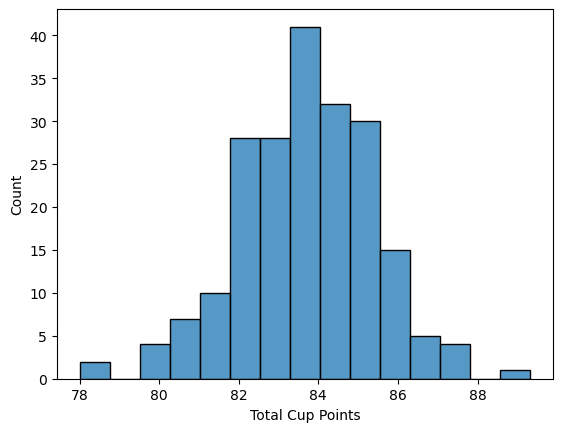

In [112]:
sns.histplot(dataset['Total Cup Points'])

In [113]:
dataset.shape

(207, 42)

In [141]:
# sample size
n = 31
number_of_samples = 3000

sample = []

for i in range(number_of_samples):
    sample.append(dataset['Total Cup Points'].sample(n).reset_index(drop=True))

samples = pd.concat(sample, axis=1)
samples.columns = [f"Sample {str(i+1)}" for i in range(number_of_samples)]

(samples)

,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10,...,Sample 2991,Sample 2992,Sample 2993,Sample 2994,Sample 2995,Sample 2996,Sample 2997,Sample 2998,Sample 2999,Sample 3000
0,85.67,82.50,83.17,84.08,86.25,83.67,83.92,82.50,86.08,85.75,...,80.50,83.42,82.33,84.75,81.83,85.67,82.67,82.42,84.42,85.00
1,83.67,85.17,83.83,85.25,84.67,83.58,83.83,84.58,81.83,86.25,...,83.67,82.17,85.33,83.08,85.08,82.50,84.92,83.67,82.92,87.17
2,86.17,84.83,83.92,84.83,84.33,83.33,85.25,84.58,82.50,87.42,...,80.42,82.83,81.75,83.75,82.00,78.08,83.08,83.58,84.33,85.75
3,82.50,82.33,81.17,85.08,83.42,82.00,80.42,82.33,82.50,82.00,...,84.33,84.25,85.92,85.00,82.00,84.67,82.00,84.00,82.83,82.42
4,84.50,85.25,85.83,84.75,83.42,80.33,83.92,81.75,83.33,84.33,...,84.00,80.17,86.08,84.75,80.50,83.92,82.83,85.67,83.42,83.17
5,85.25,85.50,82.17,80.42,84.92,85.00,82.92,81.17,84.33,84.25,...,84.58,85.00,84.42,82.25,85.00,83.08,82.58,83.83,85.00,83.67
6,84.75,84.50,86.25,86.25,81.17,82.75,84.08,83.50,81.75,85.25,...,83.92,87.42,82.58,83.67,84.00,83.17,84.75,83.83,81.83,81.00
7,84.58,83.67,83.08,82.08,85.67,82.00,84.25,84.00,85.58,85.50,...,83.83,82.92,85.67,83.08,84.00,84.25,81.92,84.67,89.33,83.42
8,82.67,85.00,80.33,84.83,85.58,81.92,87.58,85.92,81.50,84.75,...,85.92,84.50,84.67,83.67,84.75,83.67,83.33,85.67,85.08,82.58
9,83.33,83.25,83.33,83.25,83.58,89.33,82.17,82.83,83.92,80.33,...,82.92,84.58,82.58,84.00,82.50,87.00,86.25,83.33,83.58,84.75


<Axes: ylabel='Count'>

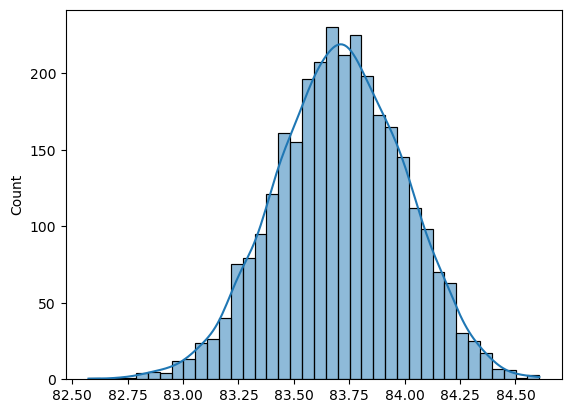

In [142]:
sns.histplot(samples.mean(), kde=True)

In [143]:
samples.mean().min(), samples.mean().max()

(82.57322580645163, 84.60774193548387)

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

In [144]:
dataset['Total Cup Points'].mean(), samples.mean().mean()

(83.70657004830917, 83.70824053763441)

In [145]:
std_df = dataset['Total Cup Points'].std()
std_samples = samples.mean().std()

print(f"Desvio Padrão Var. Original: {std_df}")
print(f"Desvio Padrão Médias Amostrais: {std_samples}")
print(f"{std_df / np.sqrt(n)}")

Desvio Padrão Var. Original: 1.7304170112116843
Desvio Padrão Médias Amostrais: 0.28970281656701313
0.3107920699309437


In [146]:
# Bootstrap

results = []

for nrepeat in range(1000):
    sample = resample(dataset['Total Cup Points'])
    results.append(sample.median())

results = pd.Series(results)

print("Bootstrap Statistics:")
print(f"Original: {dataset['Total Cup Points'].median()}")
print(f"bias: {results.mean() - dataset['Total Cup Points'].median()}")
print(f"Std. Error: {results.std()}")

Bootstrap Statistics:
Original: 83.75
bias: -0.0032800000000037244
Std. Error: 0.14703693910531945


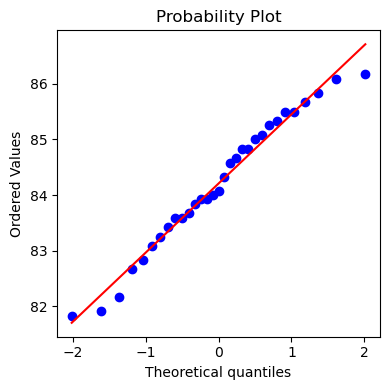

In [147]:
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(dataset['Total Cup Points'].sample(31), plot=ax)

plt.tight_layout()
plt.show()

__4) No exercício anterior, construir o intervalo de confiança para a média, com nível de confiança de 95% e erro percentual de 2% (para cima ou para baixo).__

In [148]:
def intervalo_confianca(x_medio, Z, sigma, n = 30):
    inferior = x_medio - Z * sigma / (n)**0.5
    superior = x_medio + Z * sigma / (n)**0.5
    return (inferior, superior)

In [162]:
from scipy.stats import norm

conf_level = 0.95
perc_error = 0.02
std_df = dataset['Total Cup Points'].std() #sigma
n = 30
mean_value = dataset['Total Cup Points'].sample(n).mean()

Z = norm.ppf((1 + conf_level) / 2)
E = perc_error * mean_value

inf, sup = intervalo_confianca(
  x_medio=mean_value,
  Z=Z,
  sigma=std_df,
  n=n
)

print(f"Intervalo de Confiança: [{inf}, {sup}]")

Intervalo de Confiança: [83.03312293680362, 84.27154372986301]


__5) Se uma amostra de tamanho 30, vinda da variável aleatória do exercício 2), tiver uma média 10% maior que a média da população, a hipótese de que essas médias são iguais seria rejeitada ou não rejeitada, com um nível de confiança de 95%? (faça o teste de hipótese para responder essa pergunta).__


In [188]:
from scipy.stats import norm

media_pop = dataset['Total Cup Points'].mean()
media_amostra = media_pop + (media_pop * 0.1)
n = 30
conf_level = 0.95
sig_level = 1 - conf_level # alfa
sigma = dataset['Total Cup Points'].std() # desvio populacao
desv_amostra = sigma / np.sqrt(n)

# sendo o h1 do tipo "diferente" (bicaudal)
Zinf, Zsup = norm.ppf(sig_level/2), norm.isf(sig_level/2)
z = (media_amostra - media_pop) / desv_amostra

maximo = norm.ppf(
    1 - sig_level/2,
    loc=media_pop,
    scale=desv_amostra,
)

minimo = norm.ppf(
    sig_level/2,
    loc=media_pop,
    scale=desv_amostra,
)

reject = (z < Zinf or z > Zsup)
pvalue = norm.sf(z) * 2

pvalue_test = pvalue <= sig_level

print(reject)
print(pvalue_test)

True
True


In [190]:
result = f"""
Média da População: {media_pop:.2f}
Média da Amostra: {media_amostra:.2f}
--
Limites: [{minimo:.2f}, {maximo:.2f}]
--
z: {z:.2f}
sigma: {sigma:.2f}
z critico: ({Zinf:.2f}, {Zsup:.2f})
--
p_valor: {pvalue:.2f}
significancia: {sig_level:.2f}
"""

print(result)


Média da População: 83.71
Média da Amostra: 92.08
--
Limites: [83.09, 84.33]
--
z: 26.50
sigma: 1.73
z critico: (-1.96, 1.96)
--
p_valor: 0.00
significancia: 0.05

